
# NumPy的部分功能如下：
- ndarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。
- 用于对整组数据进行快速运算的标准数学函数（无需编写循环）。
- 用于读写磁盘数据的工具以及用于操作内存映射文件的工具。
- 线性代数、随机数生成以及傅里叶变换功能。
- 用于集成由C、C++、Fortran等语言编写的代码的A C API。

# 数据分析应用功能
- 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数组运算。
- 常用的数组算法，如排序、唯一化、集合运算等。
- 高效的描述统计和数据聚合/摘要运算。
- 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算。
- 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环）。
- 数据的分组运算（聚合、转换、函数应用等）。。

# NumPy的ndarray：一种多维数组对象

NumPy 主要的运算对象为同质的多维数组，即由同一类型元素（一般是数字）组成的表格，且所有元素通过正整数元组进行索引。在 NumPy 中，维度 (dimension) 也被称之为轴线（axes)。
- ndarray.ndim：显示数组的轴线数量（或维度）
- ndarray.shape：显示在每个维度里数组的大小。如 n 行 m 列的矩阵，它的 shape 就是（n,m)。
- ndarray.size：数组中所有元素的总量，相当于数组的 shape 中所有元素的乘积，例如矩阵的元素总量为行与列的乘积。
- ndarray.dtype：显示数组元素的类型。Python 中的标准 type 函数同样可以用于显示数组类型，NumPy 有它自己的类型如：numpy.int32, numpy.int16, 和 numpy.float64，其中「int」和「float」代表数据的种类是整数还是浮点数，「32」和「16」代表这个数组的字节数（存储大小）。
- ndarray.itemsize：数组中每个元素的字节存储大小。例如元素类型为 float64 的数组，其 itemsize 为 8（=64/8）。

numpy.array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)

In [2]:
import numpy as np

b = np.array([[20061, 10570, 17803, 59540, 3157, 11444, 3608, 56582, 49236, 32295], [20063, 10570, 62740, 8398, 11342, 13754, 16574, 49236, 31210, 20063]])
print(b[0])
print(b.size)
print(b.shape)
print(b.ndim)
print(b.dtype)
print(b.itemsize)

[20061 10570 17803 59540  3157 11444  3608 56582 49236 32295]
20
(2, 10)
2
int32
4


# numpy向量说明
- 为numpy数组给定形状时，如果只指定了一个维度，numpy无法确定是行向量还是列向量
- 所以在为数组给定形状时，应该确定其形状

In [6]:
import numpy as np
a = np.random.randn(5)
print(a)
print(a.shape)
a.T
a.T.T
np.dot(a, a.T)
a = np.random.rand(5,1)
print(a.shape)

[ 0.64976386 -0.51288807  0.11679839  2.71873427 -0.1928992 ]
(5,)
(5, 1)


# 断言数组形状

In [9]:

assert (a.shape == (5,1))

In [10]:
assert (a.shape == (1,5))

AssertionError: 

# 创建numpy数组
![数组创建](./img/numpy数组创建函数.png)

In [12]:
import numpy as np
a = np.array([2,3,4,5])
a
arr = np.asarray([i for i in range(100) if i % 2 == 0])
arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [8]:
# np.array(1,2,3,4) #此时传递了四个参数谷错误
np.array((1,2,3,4)) #传入一个可迭代元组

array([1, 2, 3, 4])

In [9]:
# numpy中如果在同一个维度上给定的元素数量不一致，将无法生存numpy类型数组
b = np.array([(1,5,8),(2,3,2,6)])
b

array([(1, 5, 8), (2, 3, 2, 6)], dtype=object)

In [92]:
#创建时指定数组类型
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [95]:
#创建全零数组
#给定一个表示数组维度的元组，可以指定元素类型
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [96]:
np.ones( (2,3,4), dtype=np.int16 )

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [98]:
#empty可以创建一个没有任何具体值的数组
np.empty( (2,3) )  

array([[1. , 5. , 8. ],
       [2. , 3.2, 6. ]])

In [101]:
#为了创建数列，NumPy 提供一个与 range 类似的函数来创建数组：arange。
#arrang(起始值，终止值，差值)
np.arange(10,30,5)

array([10, 15, 20, 25])

In [102]:
np.arange( 0, 2, 0.3 ) 

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

当 arange 使用浮点型参数时，因为浮点精度的有限性，arange 不能判断有需要创建的数组多少个元素。在这种情况下，换成 linspace 函数可以更好地确定区间内到底需要产生多少个数组元素。

In [103]:
from numpy import pi
np.linspace(0,2,9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [105]:
x = np.linspace(0,2*pi,100)
x

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

# 输出数组
当你输出一个数组时，NumPy 显示这个数组的方式和嵌套列表是相似的。但将数组打印到屏幕需要遵守以下布局：
- 最后一个轴由左至右打印
- 倒数第二个轴为从上到下打印
- 其余的轴都是从上到下打印，且每一块之间都通过一个空行分隔

In [107]:
a = np.arange(6) 
a

array([0, 1, 2, 3, 4, 5])

In [109]:
b = np.arange(12).reshape(4,3)
b

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [112]:
c = np.arange(24*5).reshape(2,3,4,5) 
c

array([[[[  0,   1,   2,   3,   4],
         [  5,   6,   7,   8,   9],
         [ 10,  11,  12,  13,  14],
         [ 15,  16,  17,  18,  19]],

        [[ 20,  21,  22,  23,  24],
         [ 25,  26,  27,  28,  29],
         [ 30,  31,  32,  33,  34],
         [ 35,  36,  37,  38,  39]],

        [[ 40,  41,  42,  43,  44],
         [ 45,  46,  47,  48,  49],
         [ 50,  51,  52,  53,  54],
         [ 55,  56,  57,  58,  59]]],


       [[[ 60,  61,  62,  63,  64],
         [ 65,  66,  67,  68,  69],
         [ 70,  71,  72,  73,  74],
         [ 75,  76,  77,  78,  79]],

        [[ 80,  81,  82,  83,  84],
         [ 85,  86,  87,  88,  89],
         [ 90,  91,  92,  93,  94],
         [ 95,  96,  97,  98,  99]],

        [[100, 101, 102, 103, 104],
         [105, 106, 107, 108, 109],
         [110, 111, 112, 113, 114],
         [115, 116, 117, 118, 119]]]])

# numpy基本数学运算

In [9]:
import numpy as np
arr = np.array([[2,5,7],[3,2,8]])
arr
arr * arr

array([[ 4, 25, 49],
       [ 9,  4, 64]])

In [27]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [28]:
arr + arr

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [29]:
1 /arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [30]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [31]:
arr + 1

array([[2., 3., 4.],
       [5., 6., 7.]])

# numpy逻辑运算

In [10]:
import numpy as np
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [11]:
arr2 > arr

array([[False, False, False],
       [ True, False,  True]])

# numpy基本线性代数运算
线性代数有矩阵乘法，矩阵转置，矩阵分解

In [37]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.,7.], [-1, 7,9], [8, 9,20]])
print(x)
print(y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.  7.]
 [-1.  7.  9.]
 [ 8.  9. 20.]]


In [38]:
x.dot(y)

array([[ 28.,  64.,  85.],
       [ 67., 181., 193.]])

In [39]:
np.dot(x, y)

array([[ 28.,  64.,  85.],
       [ 67., 181., 193.]])

In [40]:
x.T

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

In [41]:
#***************
np.dot(x, np.ones(3))

array([ 6., 15.])

默认状态下，这些运算会把数组视为一个数列而不论它的 shape。然而，如果在指定 axis 参数下，你可以指定针对哪一个维度进行运算。如下 axis=0 将针对每一个列进行运算，例如 b.sum(axis=0) 将矩阵 b 中每一个列的所有元素都相加为一个标量。

In [113]:
b = np.arange(12).reshape(3,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [114]:
b.sum(axis=0)

array([12, 15, 18, 21])

In [115]:
b.min(axis=1)

array([0, 4, 8])

In [116]:
b.cumsum(axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]], dtype=int32)

# numpy 数学运算

In [45]:
data  = np.array([[6., 23.,7.], [-1, 7,9], [8, 9,20]])
data

array([[ 6., 23.,  7.],
       [-1.,  7.,  9.],
       [ 8.,  9., 20.]])

In [46]:
np.exp(data)

array([[4.03428793e+02, 9.74480345e+09, 1.09663316e+03],
       [3.67879441e-01, 1.09663316e+03, 8.10308393e+03],
       [2.98095799e+03, 8.10308393e+03, 4.85165195e+08]])

In [48]:
np.log(data)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([[1.79175947, 3.13549422, 1.94591015],
       [       nan, 1.94591015, 2.19722458],
       [2.07944154, 2.19722458, 2.99573227]])

In [49]:
np.abs(data)

array([[ 6., 23.,  7.],
       [ 1.,  7.,  9.],
       [ 8.,  9., 20.]])

In [50]:
np.max(data)

23.0

In [52]:
np.min(data)

-1.0

# numpy数组基本索引和切片
- NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。
- 当你将一个标量值赋值给一个切片时（如arr[5:8]=12），该值会自动传播（也就说后面将会讲到的“广播”）到整个选区。跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

### 1一维数组索引切片与python列表相似

In [3]:
import numpy as np
arr = np.arange(1,20,2)
arr

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [4]:
#索引一个值
arr[5]

11

In [5]:
#索引一个序列子集
arr[5:8]

array([11, 13, 15])

In [6]:
#索引带步长
arr[2:8:2]

array([ 5,  9, 13])

In [19]:
# 反向索引
arr[5::-1]

array([11,  9,  7,  5,  3,  1])

In [20]:
arr[5:9:-1]

array([], dtype=int32)

### 2二及多维维数组索引切片
- 对二维及多维数组切片，不同的维度之间用“，”隔开，同一维度之间用“：”分隔

In [21]:
arr2d = np.array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [22]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
#在第0轴上取0:2，在1轴上取0：2
arr2d[0:2,:2]

array([[1, 2],
       [4, 5]])

### 3布尔型索引


### 4花式索引
花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。


In [27]:
arr = np.empty((8, 4))

In [28]:
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [29]:
arr[[4,2,6]]

array([[4., 4., 4., 4.],
       [2., 2., 2., 2.],
       [6., 6., 6., 6.]])

# 伪随机数生成
numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器：

In [23]:
# 生成正态分布
import matplotlib.pyplot as plt
import numpy as np

samples = np.random.normal(size=(10))
samples

array([ 0.82408229,  2.07157482, -0.58116098, -1.43604613,  0.1219516 ,
       -0.42573799, -0.61128222, -0.47742789, -0.13735381, -0.6716166 ])

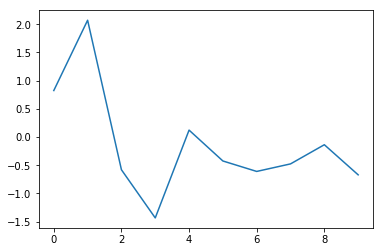

In [24]:
plt.plot([i for i in range(10)], samples)

In [25]:
# 设置随机种子步长
np.random.seed(1234)

In [33]:
rng = np.random.RandomState(12)

In [34]:
rng.randn(10)

array([ 0.47298583, -0.68142588,  0.2424395 , -1.70073563,  0.75314283,
       -1.53472134,  0.00512708, -0.12022767, -0.80698188,  2.87181939])

### 随机漫步
我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步的例子：从0开始，步长1和－1出现的概率相等。

In [35]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
    

In [37]:
import matplotlib.pyplot as plt

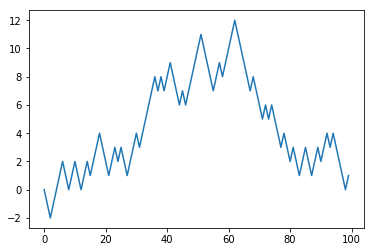

In [38]:
plt.plot(walk[:100])